In [75]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# Load the data
data = pd.read_csv('new.csv')
data = data*100
# Separate the features and target
X = data.iloc[:, 1:5]
y = data.iloc[:, 0]
X

,open,high,low,close
0,-0.060988,0.203293,-0.630209,-0.121976
1,0.142479,0.569917,-0.040708,0.366375
2,-0.202799,0.000000,-0.344758,-0.263638
3,-0.345669,0.772672,-0.427003,0.650671
4,0.181818,0.525253,0.000000,0.303030
...,...,...,...,...
1985,0.514626,0.704225,-0.270856,0.352113
1986,0.134953,0.404858,-0.215924,0.161943
1987,-0.053894,0.619779,-0.889248,-0.565885
1988,0.298103,2.249320,0.271003,1.842820


In [77]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
y_scaled
# X_scaled = X.values
# y_scaled = y.values

In [ ]:
X_train = []
y_train = []
split_idx = int(len(X_scaled) * 0.8)
for i in range(60,split_idx):
    X_train.append(X_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [78]:
# Split the data into training and testing sets
split_idx = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]
X_train.shape

(1592, 4)

In [79]:
print(X_train.shape[1])

4


In [80]:
# Reshape the input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

Epoch 1/50


/Users/ldvyyc/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1961
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1479
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0739
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1054
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2112
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1047
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1829
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1128
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2244
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9986
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2058
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0899
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1119
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1426
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8997
Epoch 16/50
25/25 ━━━━━━━━━━━━

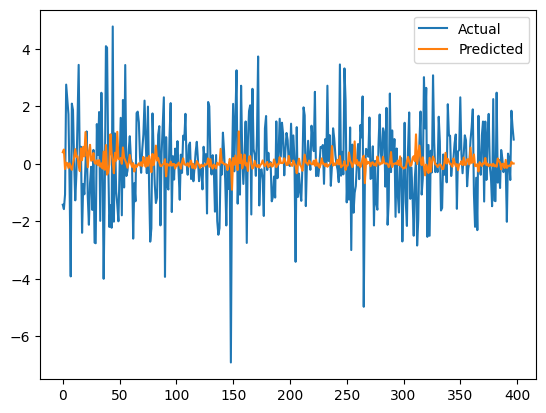

In [81]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (1, X_train.shape[2])))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
regressor.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_pred = regressor.predict(X_test)

# Invert scaling for plotting
# y_test_inv = scaler.inverse_transform(y_test)
# y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = y_test
y_pred_inv = y_pred

# Plot the results
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.show()


In [82]:
# 计算正确率， 如果predict和actual都>0 或者都<0 则为1， 否则为0
correct = 0
for i in range(len(y_test_inv)):
    if (y_test_inv[i] > 0 and y_pred_inv[i] > 0) or (y_test_inv[i] < 0 and y_pred_inv[i] < 0):
        correct += 1
accuracy = correct / len(y_test_inv)
print('Accuracy:', accuracy)

Accuracy: 0.4899497487437186
